In [149]:
import os
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np 
import seaborn as sns
# retina display from config
plt.rcParams['figure.dpi'] = 300

In [3]:
os.getcwd()

'/Users/joaomatos/Documents/ehrmonize/experiments'

In [219]:
all_files = [f for f in os.listdir("metrics/experiments1/") if f.endswith(".csv")]

df = pd.concat([pd.read_csv("metrics/experiments1/" + f).assign(source_file=f) for f in all_files])

# transform the 'source_file' to remove the .csv and the suffix 'MIMMIC-IV' or 'eICU-CRD'
df['source_file'] = df['source_file'].str.replace('.csv', '')
df['source_file'] = df['source_file'].str.replace('_MIMIC-IV', '')
df['source_file'] = df['source_file'].str.replace('_eICU-CRD', '')

# fill na with 0
df = df.fillna(0)


In [220]:
df

,db,model_id,temperature,n_shots,n_attempts,agentic,elapsed_time,consistencies,accuracy_score,source_file,precision_score,recall_score,f1_score,specificity_score,balanced_accuracy_score
0,MIMIC-IV,anthropic.claude-3-5-sonnet-20240620-v1:0,0.0,10,1,False,136.477,0.0,0.985,get_generic_route,0.000,0.0,0.000,0.000,0.000
1,MIMIC-IV,anthropic.claude-3-5-sonnet-20240620-v1:0,0.2,10,1,False,135.700,0.0,0.985,get_generic_route,0.000,0.0,0.000,0.000,0.000
2,MIMIC-IV,anthropic.claude-3-5-sonnet-20240620-v1:0,0.5,10,1,False,139.370,0.0,0.975,get_generic_route,0.000,0.0,0.000,0.000,0.000
3,MIMIC-IV,meta.llama3-70b-instruct-v1:0,0.0,10,1,False,61.048,0.0,0.970,get_generic_route,0.000,0.0,0.000,0.000,0.000
4,MIMIC-IV,meta.llama3-70b-instruct-v1:0,0.2,10,1,False,68.281,0.0,0.975,get_generic_route,0.000,0.0,0.000,0.000,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25,eICU-CRD,gpt-3.5-turbo,0.2,10,1,False,82.747,0.0,0.040,one_hot_stress_ulcer_prophylaxis,0.040,1.0,0.077,0.000,0.500
26,eICU-CRD,gpt-3.5-turbo,0.5,10,1,False,192.016,0.0,0.040,one_hot_stress_ulcer_prophylaxis,0.040,1.0,0.077,0.000,0.500
27,eICU-CRD,gpt-4o,0.0,10,1,False,100.489,0.0,0.995,one_hot_stress_ulcer_prophylaxis,0.889,1.0,0.941,0.995,0.997
28,eICU-CRD,gpt-4o,0.2,10,1,False,159.836,0.0,0.995,one_hot_stress_ulcer_prophylaxis,0.889,1.0,0.941,0.995,0.997


In [221]:
# create a new df that averages the metrics for the same model, temperature, task for both datasets
# and the 'db' becomes 'both'

df = df.groupby(['model_id', 'temperature', 'source_file'])[['f1_score','accuracy_score']].mean().reset_index()

In [226]:
# combine the f1 score and accuracy score into one column
# keep accuracy score if 'source_file' starts with 'get_'
df['f1_score'] = np.where(df['source_file'].str.startswith('get_'), df['accuracy_score'], df['f1_score'])


In [89]:
df.source_file.nunique()

8

In [90]:
df.model_id.value_counts()

model_id
anthropic.claude-v2:1                 24
gpt-3.5-turbo                         24
gpt-4o                                24
meta.llama3-70b-instruct-v1:0         24
mistral.mixtral-8x7b-instruct-v0:1    24
Name: count, dtype: int64

In [222]:
task_names = {
    "one_hot_antibiotic": "Antibiotic",
    "one_hot_anticoagulant": "Anticoagulant",
    "one_hot_electrolytes": "Electrolytes",
    "one_hot_iv_fluid": "Intravenous Fluid",
    "one_hot_opioid_analgesic": "Opioid Analgesic",
    "one_hot_stress_ulcer_prophylaxis": "Stress Ulcer Prophylaxis",
    "get_generic_name": "Drug Generic Name",
    "get_generic_route": "Route Generic Name",
}

In [233]:
model_names = {
    "meta.llama3-70b-instruct-v1:0": "Llama3\nx70B",
    "anthropic.claude-3-5-sonnet-20240620-v1:0": "Claude-3.5\nSonnet",
    "mistral.mixtral-8x7b-instruct-v0:1": "Mixtral8\nx7B",
    "gpt-3.5-turbo": "GPT-3.5\nTurbo",
    "gpt-4o": "GPT-4o",
}

In [234]:
df

,model_id,temperature,source_file,f1_score,accuracy_score
0,anthropic.claude-3-5-sonnet-20240620-v1:0,0.0,get_generic_name,0.7965,0.7965
1,anthropic.claude-3-5-sonnet-20240620-v1:0,0.0,get_generic_route,0.9625,0.9625
2,anthropic.claude-3-5-sonnet-20240620-v1:0,0.0,one_hot_antibiotic,1.0000,1.0000
3,anthropic.claude-3-5-sonnet-20240620-v1:0,0.0,one_hot_anticoagulant,0.8935,0.9900
4,anthropic.claude-3-5-sonnet-20240620-v1:0,0.0,one_hot_electrolytes,0.6225,0.8765
...,...,...,...,...,...
115,mistral.mixtral-8x7b-instruct-v0:1,0.5,one_hot_anticoagulant,0.7160,0.7765
116,mistral.mixtral-8x7b-instruct-v0:1,0.5,one_hot_electrolytes,0.4660,0.7510
117,mistral.mixtral-8x7b-instruct-v0:1,0.5,one_hot_iv_fluid,0.3835,0.4940
118,mistral.mixtral-8x7b-instruct-v0:1,0.5,one_hot_opioid_analgesic,0.7390,0.9095


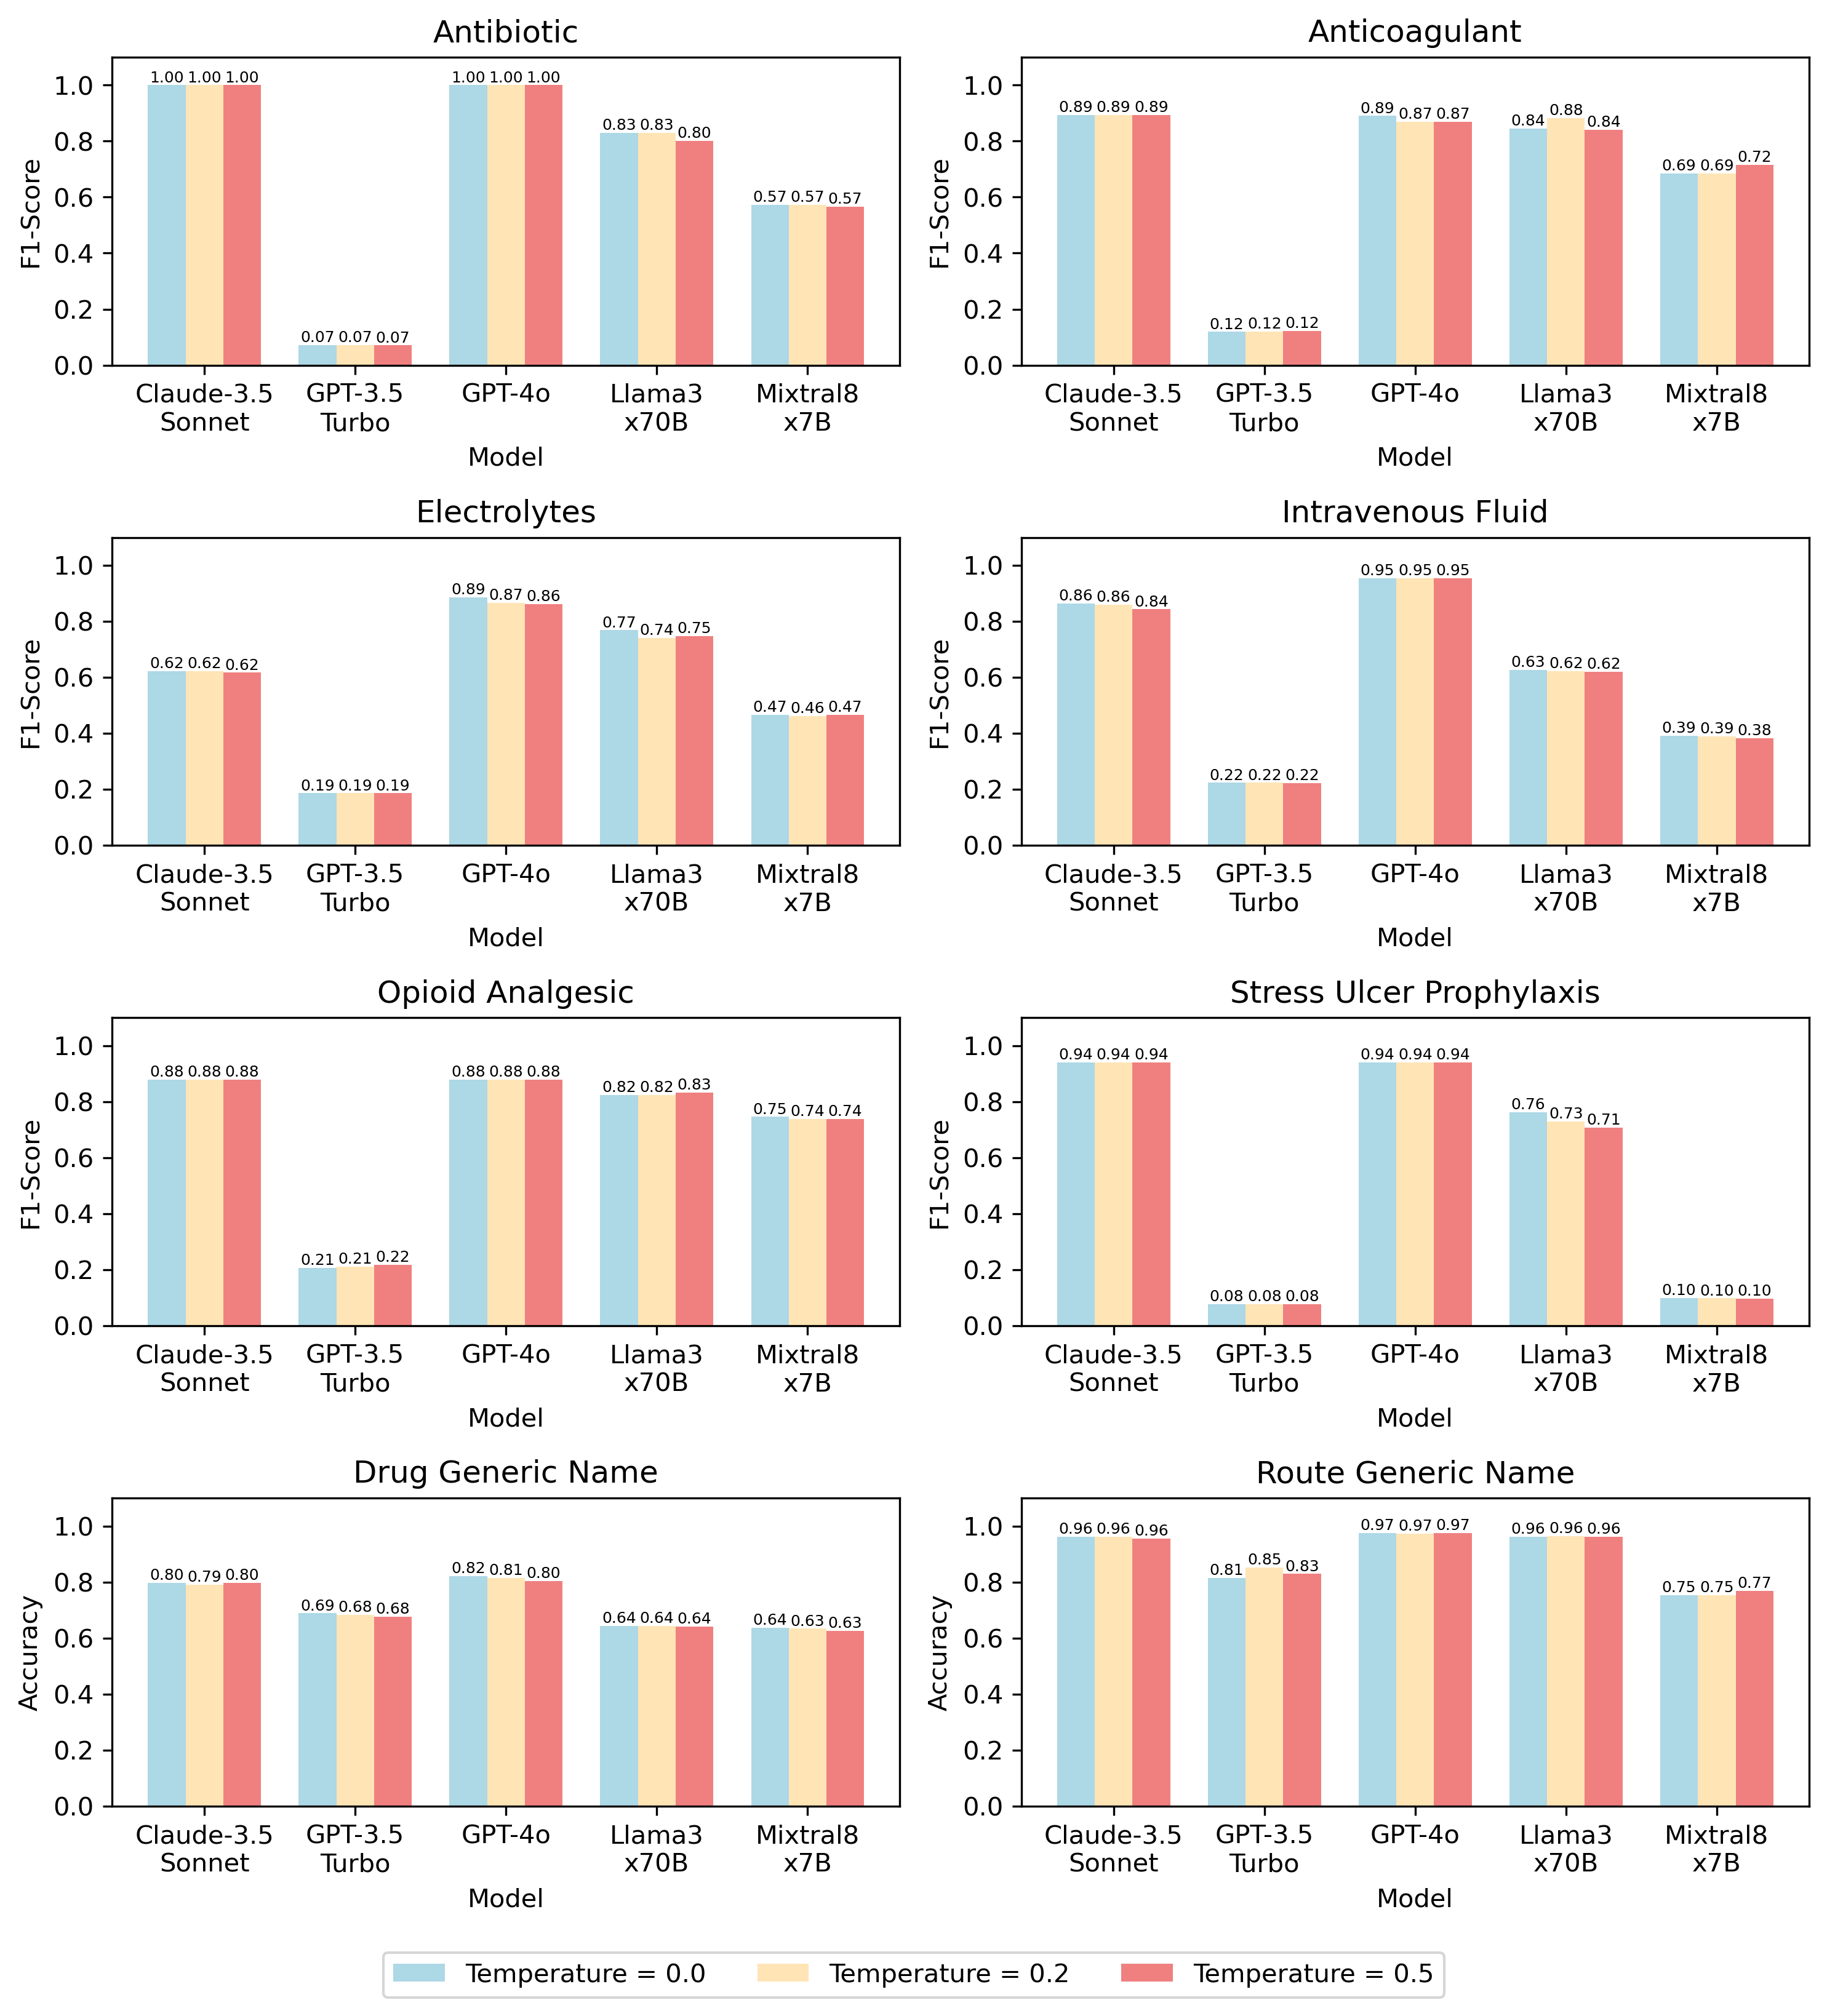

In [237]:
# Unique temperatures and colors
temperatures = df.temperature.unique()
colors = ['lightblue', 'moccasin', 'lightcoral', ]  # Adding a third color

# Create a 4x2 grid of plots
fig, axs = plt.subplots(4, 2, figsize=(10, 11))

# Keep track of handles and labels for the legend
handles = []
labels = []

for i, (file, name) in enumerate(task_names.items()):
    ax = axs[i // 2, i % 2]

    # Filter and pivot the DataFrame
    filtered_df = df[df.source_file == file]
    pivot_df = filtered_df.pivot(index='model_id', columns='temperature', values='f1_score')
    
    # Replace model_ids with proper names
    pivot_df.index = pivot_df.index.map(model_names)
    
    # Plotting each model_id with its temperatures side by side
    model_ids = pivot_df.index
    bar_width = 0.25  # Adjusting bar width for three bars
    x = np.arange(len(model_ids))  # the label locations

    for j, temp in enumerate(temperatures):
        bars = ax.bar(x + j * bar_width, pivot_df[temp], bar_width, label=f'Temperature {temp}', color=colors[j])
        if i == 0:  # Only need to add the legend items once
            handles.append(bars[0])
            labels.append(f'Temperature = {temp}')
        
        # Add text labels on top of each bar
        for bar in bars:
            height = bar.get_height()
            ax.text(
                bar.get_x() + bar.get_width() / 2,
                height,
                f'{height:.2f}',
                ha='center',
                va='bottom',
                fontsize=6
            )

    # Setting titles and labels
    ax.set_title(name)
    ax.set_xlabel("Model")
    # if source_file starts with 'get_', then the y-axis label is 'Accuracy'
    ax.set_ylabel("Accuracy" if file.startswith('get_') else "F1-Score")
    ax.set_xticks(x + bar_width)  # Positioning the xticks properly for three bars
    ax.set_xticklabels(model_ids, rotation=0)
    ax.set_ylim(0, 1.1)  # Limiting y-axis from 0 to 1.1

# Add a single legend outside the plots
fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, 0), ncol=3)  # Adjust ncol for three items

# Adding a title to the entire figure
# fig.suptitle("One-Hot Encoded Medication Classification Performance", y=0.98)

plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust rect to make space for the legend
plt.show()

# Save the plot
fig.savefig("plots/figure2.png", bbox_inches="tight")


In [247]:
files2 = [f for f in os.listdir("metrics/experiments2/") if f.endswith(".csv")] 
# read the files
df = pd.concat([pd.read_csv("metrics/experiments2/" + f).assign(source_file=f) for f in files2])

# Define task names for the legend
task_names = {
    "one_hot_antibiotic": "Antibiotic",
    "one_hot_anticoagulant": "Anticoagulant",
    "one_hot_electrolytes": "Electrolytes",
    "one_hot_iv_fluid": "Intravenous Fluid",
    "one_hot_opioid_analgesic": "Opioid Analgesic",
    "one_hot_stress_ulcer_prophylaxis": "Stress Ulcer Prophylaxis",
    "get_generic_name": "Drug Generic Name",
    "get_generic_route": "Route Generic Name",
}

df['source_file'] = df['source_file'].str.replace('.csv', '')

# Add a new column 'task' with mapped task names
df['task'] = df['source_file'].map(task_names)

In [248]:
df.head()

,db,model_id,temperature,n_shots,n_attempts,agentic,elapsed_time,consistencies,accuracy_score,source_file,precision_score,recall_score,f1_score,specificity_score,balanced_accuracy_score,task
0,MIMIC-IV,meta.llama3-70b-instruct-v1:0,0.2,10,1,False,73.649,NaN,0.970,get_generic_route,NaN,NaN,NaN,NaN,NaN,Route Generic Name
1,MIMIC-IV,meta.llama3-70b-instruct-v1:0,0.2,10,5,False,333.932,0.997,0.970,get_generic_route,NaN,NaN,NaN,NaN,NaN,Route Generic Name
2,MIMIC-IV,meta.llama3-70b-instruct-v1:0,0.2,5,1,False,66.477,NaN,0.944,get_generic_route,NaN,NaN,NaN,NaN,NaN,Route Generic Name
3,MIMIC-IV,meta.llama3-70b-instruct-v1:0,0.2,5,5,False,326.966,1.000,0.944,get_generic_route,NaN,NaN,NaN,NaN,NaN,Route Generic Name
4,MIMIC-IV,meta.llama3-70b-instruct-v1:0,0.2,2,1,False,60.247,NaN,0.944,get_generic_route,NaN,NaN,NaN,NaN,NaN,Route Generic Name


In [249]:
df[['db','n_shots','n_attempts','f1_score','accuracy_score','task']]


,db,n_shots,n_attempts,f1_score,accuracy_score,task
0,MIMIC-IV,10,1,NaN,0.970,Route Generic Name
1,MIMIC-IV,10,5,NaN,0.970,Route Generic Name
2,MIMIC-IV,5,1,NaN,0.944,Route Generic Name
3,MIMIC-IV,5,5,NaN,0.944,Route Generic Name
4,MIMIC-IV,2,1,NaN,0.944,Route Generic Name
...,...,...,...,...,...,...
15,eICU-CRD,2,5,0.500,0.920,Stress Ulcer Prophylaxis
16,eICU-CRD,1,1,0.552,0.935,Stress Ulcer Prophylaxis
17,eICU-CRD,1,5,0.571,0.940,Stress Ulcer Prophylaxis
18,eICU-CRD,0,1,0.281,0.795,Stress Ulcer Prophylaxis


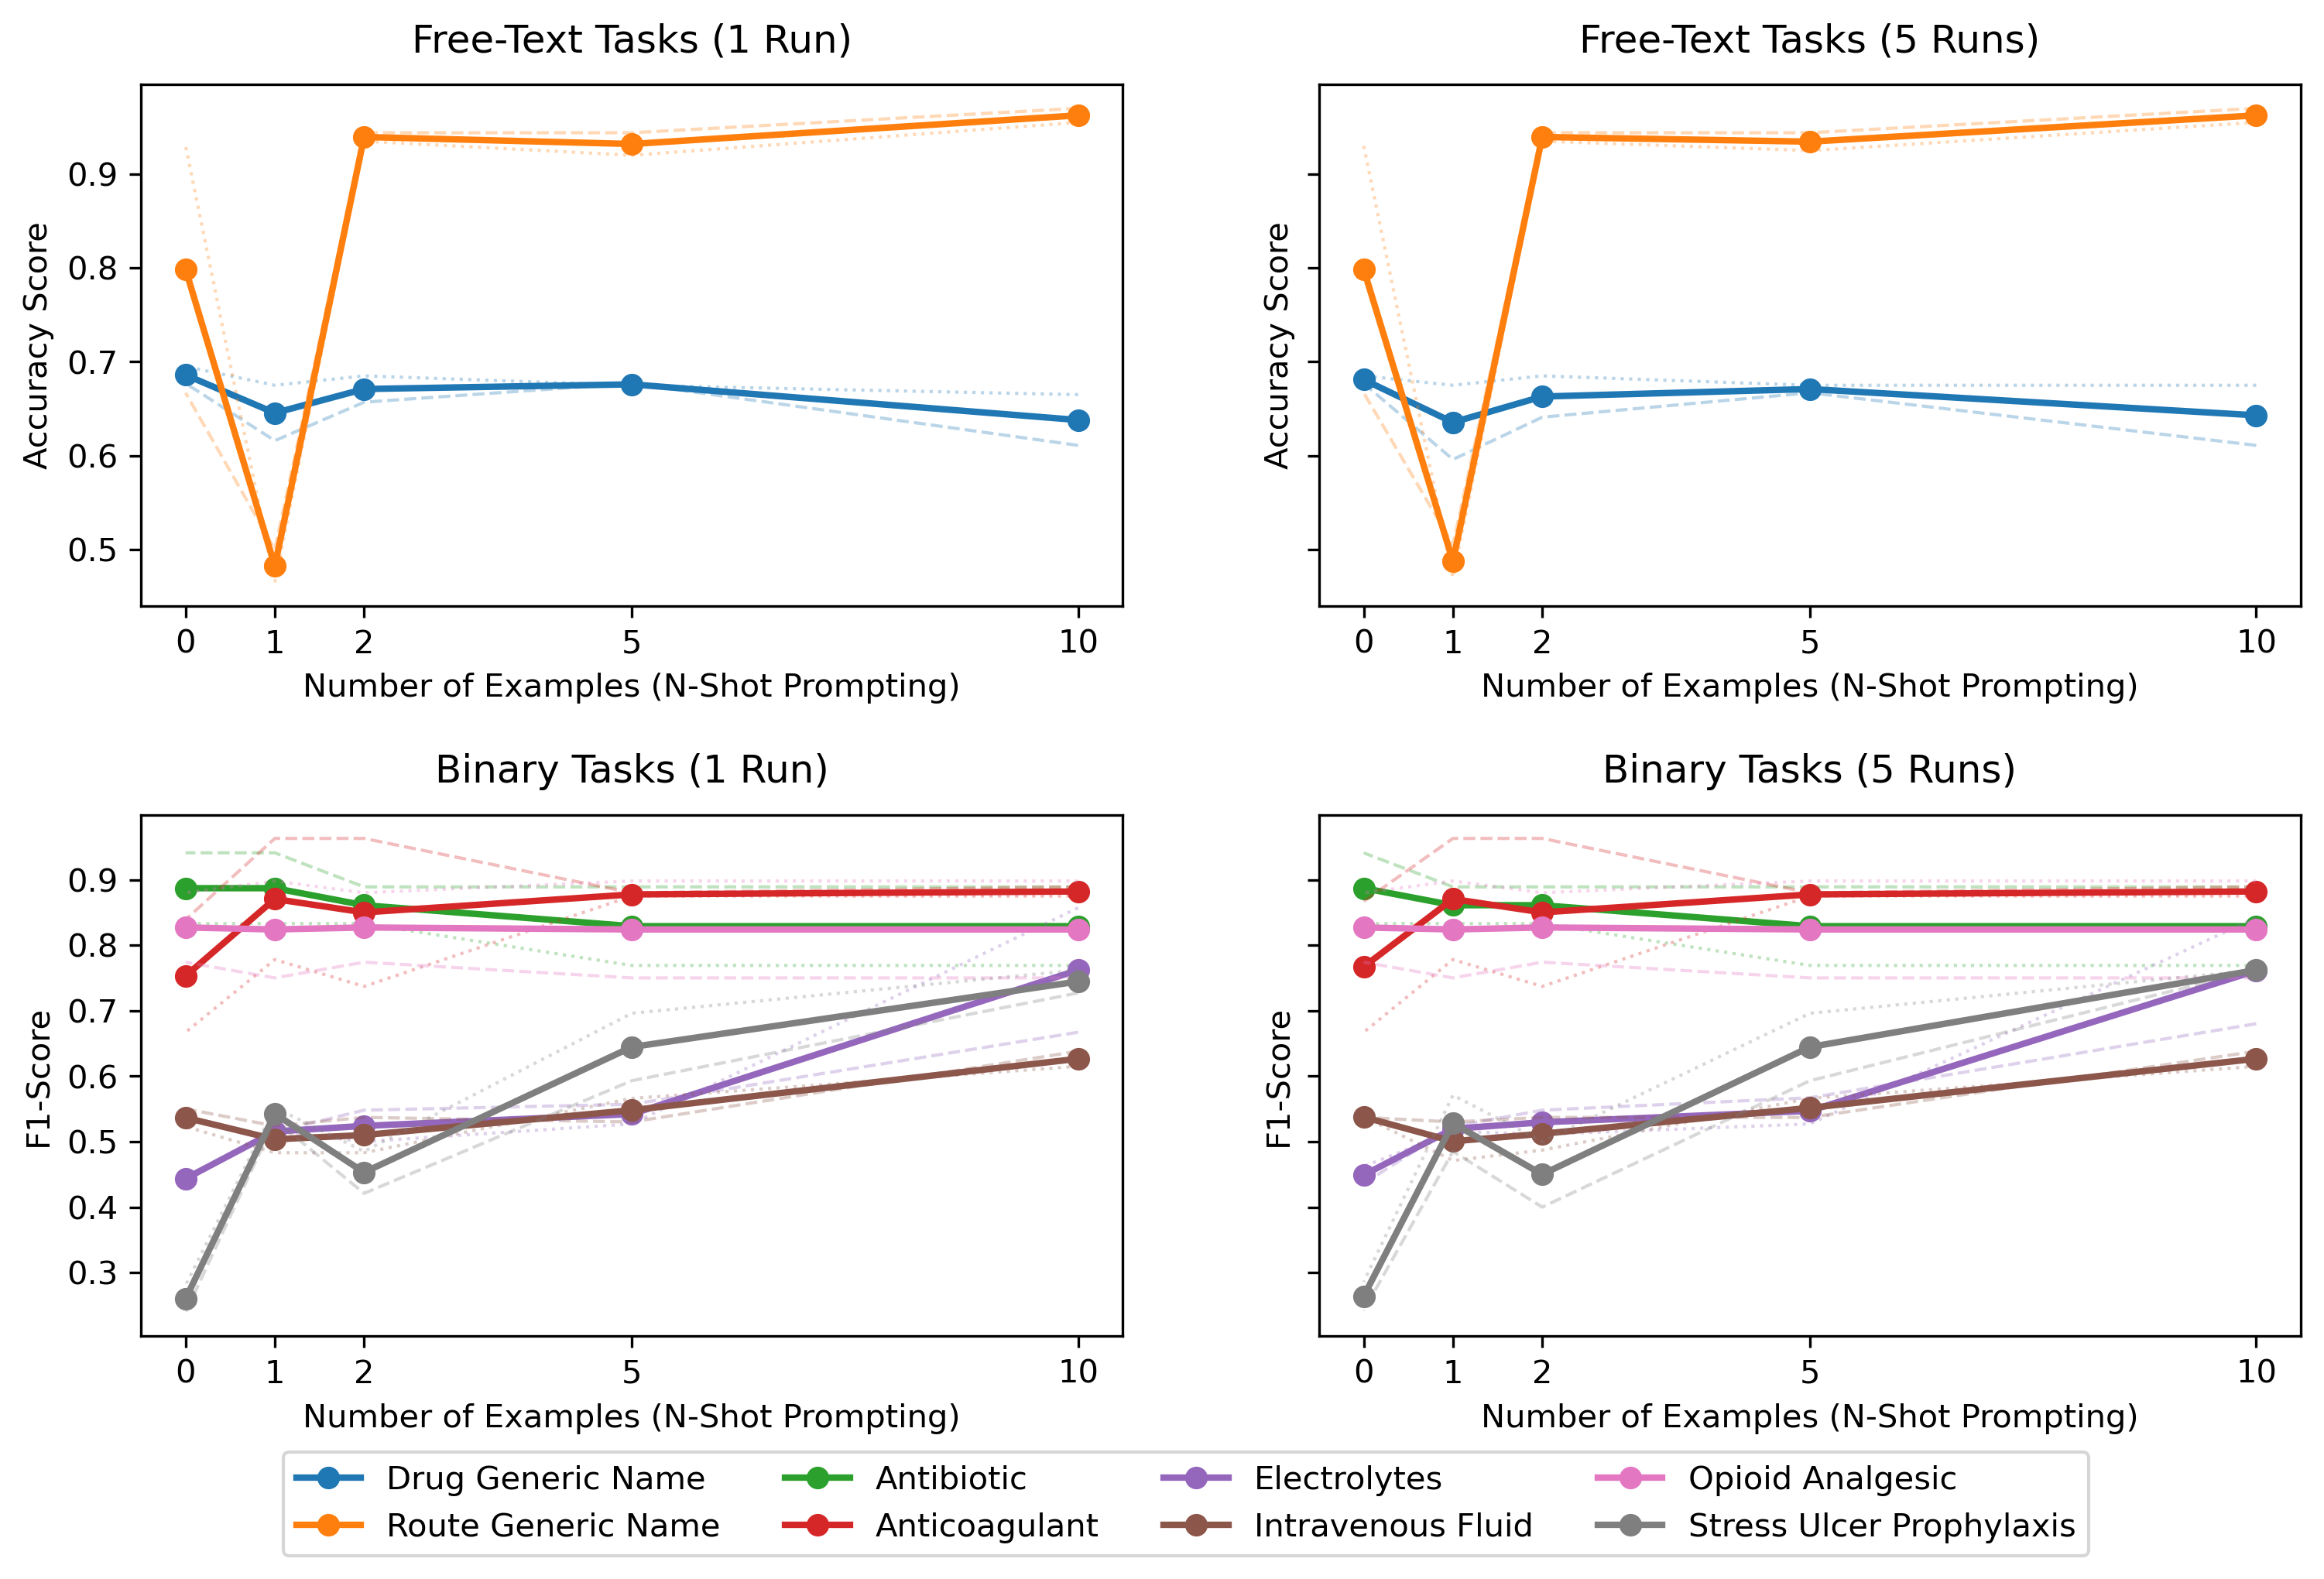

In [250]:
# Assuming 'all_df' is your DataFrame
# Define task names for mapping
task_names = {
    "one_hot_antibiotic": "Antibiotic",
    "one_hot_anticoagulant": "Anticoagulant",
    "one_hot_electrolytes": "Electrolytes",
    "one_hot_iv_fluid": "Intravenous Fluid",
    "one_hot_opioid_analgesic": "Opioid Analgesic",
    "one_hot_stress_ulcer_prophylaxis": "Stress Ulcer Prophylaxis",
    "get_generic_name": "Drug Generic Name",
    "get_generic_route": "Route Generic Name",
}

# Separate tasks into free text and binary tasks
free_text_tasks = [
    "get_generic_name", 
    "get_generic_route",
    ]
binary_tasks = ["one_hot_antibiotic", "one_hot_anticoagulant", "one_hot_electrolytes",
                "one_hot_iv_fluid", "one_hot_opioid_analgesic", "one_hot_stress_ulcer_prophylaxis"]

# Create a figure with 2x2 subplots with more rectangular aspect
fig, axs = plt.subplots(2, 2, figsize=(12, 7), gridspec_kw={'height_ratios': [1, 1], 'hspace': 0.4,}, sharey='row')

# Define the plot parameters
plot_params = [
    ('accuracy_score', 'Free-Text Tasks', 1),
    ('accuracy_score', 'Free-Text Tasks', 5),
    ('f1_score', 'Binary Tasks', 1),
    ('f1_score', 'Binary Tasks', 5),
]

# Get unique shots from the data for x-ticks
unique_shots = sorted(df['n_shots'].unique())

# Define a color map using matplotlib 'tab:' colors
color_cycle = plt.cm.tab10.colors  # 10 unique colors from the tab10 colormap
color_map = {task: color_cycle[i] for i, task in enumerate(free_text_tasks + binary_tasks)}

# Plotting
for (metric, task_type, attempts), ax in zip(plot_params, axs.flatten()):
    if 'Free-Text' in task_type:
        tasks = free_text_tasks
    else:
        tasks = binary_tasks

    for task in tasks:
        group = df[(df['source_file'] == task) & (df['n_attempts'] == attempts)]
        mean_values = group.groupby('n_shots')[metric].mean().reset_index()

        # Scatter plot with connected lines
        ax.plot(mean_values['n_shots'], mean_values[metric], label=task_names[task], marker='o', color=color_map[task], linewidth=2)

        # Plot individual database lines with alpha for transparency
        for db_name, db_group in group.groupby('db'):
            if db_name == 'MIMIC-IV':
                linestyle = '--'
            else:
                linestyle = ':'
            ax.plot(db_group['n_shots'], db_group[metric], alpha=0.3, color=color_map[task], linewidth=1, linestyle=linestyle)

    if attempts == 1:
        runs = 'Run'
    else:
        runs = 'Runs'
    ax.set_title(f"{task_type} ({attempts} {runs})", pad=10)
    ax.set_xlabel('Number of Examples (N-Shot Prompting)')
    ylabel = metric.replace('_', ' ').title()
    if ylabel == 'F1 Score':
        ylabel = 'F1-Score'
    ax.set_ylabel(ylabel)
    ax.set_xticks(unique_shots)

# Add a single legend below the plots
handles, labels = [], []
for ax in axs.flatten():
    for handle, label in zip(*ax.get_legend_handles_labels()):
        if label not in labels:
            handles.append(handle)
            labels.append(label)

fig.legend(handles, labels, loc='lower center', ncol=4, bbox_to_anchor=(0.5, -.035))

plt.show()

fig.savefig("plots/figure3.png", bbox_inches="tight")


In [245]:
mean_values

,n_shots,f1_score
